<img src="img/usmlogo.png" style="float:right;height:85px"> <img src="img/dilogo.png" style="float:left;height:90px">
<center>
    <h1> Laboratorio 1 </h1>
    <h2> Profesor: Ricardo Ñanculef </h2>
    <h3> Ayudante: Gabriel Ortega </h3>
    <h4> Gianni Beninati; 20177508-2 ;Malla Nueva </h4>
</center>
<p>
<center><h4>Marzo 2019</h4></center>
</p>

## Instrucciones


La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 5 de abril.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. Este notebook presenta ciertas preguntas marcadas con **O:** que indican que para los alumnos de malla nueva es opcional, pero obligatoria para los alumnos de malla vieja. En el caso de haber una pareja con un integrante de malla nueva y uno de malla vieja, se considera malla vieja. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará reprobación del laboratorio con nota 0 (lo que implica reprobar el ramo con nota 0) además de la notificación correspondiente al Profesor.** 

**Puntos bonus para todos:** Debido a que a veces hay preguntas que les piden una conclusión utilizando ciertos elementos, si lo desea, puede agregar elementos extra para hacer una mejor conclusión o concluir algo más que tenga sentido con lo anterior; estos gráficos pueden otorgar puntos bonus dependiendo de su calidad y del comentario que lo acompañe (con un máximo de 3 puntos bonus por pregunta, no acumulables si alcanza la nota máxima)

# 1. Sarcasmo en Reddit (30p)

Reddit es una página web muy conocida que, en simples palabras, es una compilación de muchos foros llamados "subreddits", en esta sección trabajará con un dataset que contiene una compilación de comentarios realizados por usuarios en distintos subreddits, los que vienen con una indicación de si el comentario es sarcástico o no.
[Fuente](https://www.kaggle.com/sherinclaudia/sarcastic-comments-on-reddit)

>a) **O:** Cargue los datos y resuma brevemente que contiene el dataset

### Código pregunta 1.a

In [9]:
import csv

#Se utiliza para evitar agregar el primer dato, pues este es la descripcion de cada columna y no es un dato como tal
flag = False
label = []
comment = []
author = []
subreddit = []
score = []
ups = []
downs = []
date = []
created_utc = []
parent_comment = []
with open('reddit.csv') as csvfile:
    registros = csv.reader(csvfile, delimiter=',')
    for registro in registros:
        if flag:
            label.append(registro[0])
            comment.append(registro[1])
            author.append(registro[2])
            subreddit.append(registro[3])
            score.append(registro[4])
            ups.append(registro[5])
            downs.append(registro[6])
            date.append(registro[7])
            created_utc.append(registro[8])
            parent_comment.append(registro[9])
        flag = True

### Respuesta pregunta 1.a
Como se mencionó el dataset contiene comentarios de la plataforma “Reddit” los cuales pueden ser divididos en las siguientes columnas:
+ Label: Indica si un reddit es sarcastico o no (con 1 y 0 respectivamente)
+ Comment: Muestra el comentario acerca de un reddit
+ Author: Autor del comentario
+ Subbreddit: Muestra el subreddit de donde se realizó el comentario
+ Score: Número de "Ups" menos número de "Downs"
+ Ups: Número de votos positivos
+ Downs: Número de votos negativos
+ Date: Fecha del comentario
+ Created_UTC: Fecha y hora del comentario en zona horaria UTC
+ Parent_comment: Comentario principal del cual se realizó el comentario sarcástico.

>b) ¿Existe algún subreddit donde los comentarios no sarcásticos predominen? ¿Y alguno donde predominen los comentarios sarcásticos? 


### Código pregunta 1.b

In [10]:
#Diccionario con un subreddit como llave y una lista como valor que tiene en la primera posicion la cantidad de comentarios no sarcasticos de ese subreddit y en la segunda, la cantidad de comentarios sarcasticos
subs = {} 
n = len(label)
i = 0
while i < n:
    #Si ya se agrego el subreddit al diccionario, se ve si el comentario es sarcastico o no
    if subreddit[i] in subs:
        if label[i] == '0':
            subs[subreddit[i]][0] += 1
        else:
            subs[subreddit[i]][1] += 1
    else:
        if label[i] == '0':
            subs[subreddit[i]] = [1,0]
        else:
            subs[subreddit[i]] = [0,1]
    i+=1

In [11]:
mas_sarcastico = 0.0
menos_sarcastico = 100.0
sub_mas_sarcastico = ''
sub_menos_sarcastico = ''
#Diccionario con el subreddit como llave y con el numero "Comentarios sarcasticos de ese subreddit/Comentarios totales del subreddit" como valor, el cual indica el porcentaje de comentarios sarcasticos en ese subreddit
nivel_sarcasmo = {}
for sub in subs:
    #PARA QUE EL SUBREDDIT SEA MAS REPRESENTATIVO SE PIDE QUE TENGA AL MENOS 600 COMENTARIOS
    if (subs[sub][1]+subs[sub][0]) >= 600:
        nivel_sarcasmo[sub] = float(subs[sub][1]/(subs[sub][1]+subs[sub][0]))
#Se busca el subreddit mas y menos sarcastico con respecto al porcentaje de comentarios sarcasticos y no sarcasticos en ese subreddit
for sub in nivel_sarcasmo:
    if nivel_sarcasmo[sub] > mas_sarcastico:
        mas_sarcastico = nivel_sarcasmo[sub]
        sub_mas_sarcastico = sub
    if nivel_sarcasmo[sub] < menos_sarcastico:
        menos_sarcastico = nivel_sarcasmo[sub]
        sub_menos_sarcastico = sub
print("EL SUBREDDIT MAS SARCASTICO ES:", sub_mas_sarcastico, "CON", mas_sarcastico*100, "%  DE COMENTARIOS SARCASTICOS (", subs[sub_mas_sarcastico][1],"comentarios sarcasticos de",subs[sub_mas_sarcastico][1]+subs[sub_mas_sarcastico][0],"comentarios totales)")
print("EL SUBREDDIT MENOS SARCASTICO ES:", sub_menos_sarcastico, "con", 100-menos_sarcastico*100, "%  DE COMENTARIOS NO SARCASTICOS(", subs[sub_menos_sarcastico][1],"comentarios sarcasticos de",subs[sub_menos_sarcastico][1]+subs[sub_menos_sarcastico][0],"comentarios totales)")

EL SUBREDDIT MAS SARCASTICO ES: creepyPMs CON 78.43029637760702 %  DE COMENTARIOS SARCASTICOS ( 4287 comentarios sarcasticos de 5466 comentarios totales)
EL SUBREDDIT MENOS SARCASTICO ES: RoastMe con 90.23255813953489 %  DE COMENTARIOS NO SARCASTICOS( 63 comentarios sarcasticos de 645 comentarios totales)


### Respuesta pregunta 1.b
Para obtener el subreddit menos y más sarcástico, se creó primero un diccionario subs, el cual sería de la forma {Nombre_Subreddit:[Numero_Comentarios_NoSarcasticos,Numero_Comentarios_Sarcasticos]}, es decir, se guardaría para cada subreddit la cantidad de comentarios sarcásticos y no sarcásticos. Luego se creó el diccionario nivel_sarcasmo, el cual guardaría el porcentaje de sarcasmo de cada subreddit. Cabe destacar que para que se considerara el porcentaje del subreddit se agregó la condición de que tuviera al menos 600 comentarios, y así, de esta forma seria más representativo con respecto a toda la muestra, pues de no agregar esta condicion, los subbredits con menor y mayor sarcasmo respectivamente eran "HaircareScience" con 0% de comentarios sarcásticos de un total de 4 comentarios y "mildyinfuriating" con 100% de comentarios sarcásticos de un total de 3 comentarios, en donde 3 o 4 comentarios, no era representativo dentro del millón de comentarios que existían en la muestra. Por lo tanto, al agregar esa condición, se obtuvieron los siguientes resultados:
* Si existe un subreddit en que los comentarios no sarcásticos predominen y este corresponde a "RoastMe" con 90.23255813953489% de comentarios no sarcásticos (582 comentarios no sarcásticos de 645 comentarios totales)
* Si existe un subreddit en que los comentarios sarcásticos predominen y este corresponde a "creepyPMs" con 78.43029637760702% de comentarios sarcásticos ( 4287 comentarios sarcásticos de 5466 comentarios totales)

>c) Realice un top 10 con los subreddits que más se repiten en la etiqueta sin sarcasmo y un top 10 de los que más se repiten en la etiqueta con sarcasmo. ¿Existen similitudes/diferencias en ambas listas? ¿A qué se puede deber esto?

### Código pregunta 1.c

In [12]:
#Listas que guardaran los subreddits ordenados por comentarios con etiqueta de sarcasmo o no sarcasmo
subreddits_mas_sarcasticos = []
subreddits_menos_sarcasticos = []
i = 0

for sub in subs.items():
    #Utilizando el diccionario sub de la pregunta anterior, se agrega a la lista mas_sarcasticos la tupla (Numero_Comentarios_Sarcasticos,Nombre_Subreddit)
    subreddits_mas_sarcasticos.append((sub[1][1],sub[0]))
    #Utilizando el diccionario sub de la pregunta anterior, se agrega a la lista menos_sarcasticos la tupla (Numero_Comentarios_NOSarcasticos,Nombre_Subreddit)
    subreddits_menos_sarcasticos.append((sub[1][0],sub[0]))
#Se ordenan ambas listas de mayor a menor
subreddits_mas_sarcasticos.sort(reverse = True)
subreddits_menos_sarcasticos.sort(reverse = True)

print("LISTA 1")
print("Los 10 subreddits MENOS sarcasticos son:")
while(i < 10):
    print(i+1,"-" + subreddits_menos_sarcasticos[i][1])
    i+=1
i = 0
print("\nLISTA 2")
print("Los 10 subreddits MAS sarcasticos son:")
while(i < 10):
    print(i+1,"-" + subreddits_mas_sarcasticos[i][1])
    i+=1


LISTA 1
Los 10 subreddits MENOS sarcasticos son:
1 -AskReddit
2 -politics
3 -funny
4 -leagueoflegends
5 -worldnews
6 -pics
7 -pcmasterrace
8 -nfl
9 -news
10 -nba

LISTA 2
Los 10 subreddits MAS sarcasticos son:
1 -AskReddit
2 -politics
3 -worldnews
4 -leagueoflegends
5 -pcmasterrace
6 -news
7 -funny
8 -pics
9 -todayilearned
10 -GlobalOffensive


In [13]:
#Para realizar una mejor conclusion, se creara una tercera lista que contendra los 10 subreddits con mas comentarios
mas_populares = []
i = 0
for sub in subs.items():
    mas_populares.append((sub[1][0]+sub[1][1],sub[0]))
mas_populares.sort(reverse = True)
print("LISTA 3")
print("Los 10 subreddits MAS POPULARES son:")
while(i < 10):
    print(i+1,"-" + mas_populares[i][1])
    print("El subreddit tiene:",subs[subreddits_mas_sarcasticos[i][1]][0]+subs[subreddits_mas_sarcasticos[i][1]][1],"comentarios totales\n")
    i+=1

LISTA 3
Los 10 subreddits MAS POPULARES son:
1 -AskReddit
El subreddit tiene: 65677 comentarios totales

2 -politics
El subreddit tiene: 39496 comentarios totales

3 -worldnews
El subreddit tiene: 26377 comentarios totales

4 -leagueoflegends
El subreddit tiene: 21037 comentarios totales

5 -pcmasterrace
El subreddit tiene: 18988 comentarios totales

6 -funny
El subreddit tiene: 16891 comentarios totales

7 -news
El subreddit tiene: 17939 comentarios totales

8 -pics
El subreddit tiene: 16154 comentarios totales

9 -todayilearned
El subreddit tiene: 14161 comentarios totales

10 -nfl
El subreddit tiene: 13740 comentarios totales



### Respuesta pregunta 1.b

Para obtener los resultados, se crearon 2 listas, una que guardaría la tupla (Numero_Comentarios_Sarcasticos,Nombre_Subreddit) y otra similar, pero que guardaría el número de comentarios no sarcásticos. Finalmente se ordenaron ambas listas de mayor a menor obteniendo lo siguiente:
#### LISTA 1
Los 10 subreddits MENOS sarcástico son:
1. AskReddit
2. politics
3. funny
4. leagueoflegends
5. worldnews
6. pics
7. pcmasterrace
8. nfl
9. news
10. nba

#### LISTA 2
Los 10 subreddits MAS sarcásticos son:
1. AskReddit
2. politics
3. worldnews
4. leagueoflegends
5. pcmasterrace
6. news
7. funny
8. pics
9. todayilearned
10. GlobalOffensive

Para obtener una mejor conclusión se creó una tercera lista la cual contiene los 10 subreddits con mayor cantidad comentarios, es decir, los 10 mas populares:
#### LISTA 3
Los 10 subreddits MAS POPULARES son:
1. AskReddit  (El subreddit tiene: 65677 comentarios totales)
2. politics  (El subreddit tiene: 39496 comentarios totales)
3. worldnews  (El subreddit tiene: 26377 comentarios totales)
4. leagueoflegends  (El subreddit tiene: 21037 comentarios totales)
5. pcmasterrace  (El subreddit tiene: 18988 comentarios totales)
6. funny  (El subreddit tiene: 16891 comentarios totales)
7. news  (El subreddit tiene: 17939 comentarios totales)
8. pics  (El subreddit tiene: 16154 comentarios totales)
9. todayilearned  (El subreddit tiene: 14161 comentarios totales)
10. nfl  (El subreddit tiene: 13740 comentarios totales)

En ambas listas (1 y 2) existen grandes similitudes en los subreddits que aparecen, pues "AskReddit", "politics", "funny", "leagueoflegends","worldnews", "pics", "pcmasterrace" y "news" se encuentran tanto en la primera lista como en la segunda y en el caso de "AskReddit", "politics" y "leagueoflegends" se comparten posiciones iguales dentro del top 10. Una posible explicación a lo ocurrido, es que, sin importar si la etiqueta es de sarcasmo o no, los subreddits presentes en el top corresponden también a los más populares con respecto a la cantidad de comentarios totales (se puede apreciar en la lista 3), y al buscar los subreddits en donde más se repita una de las etiquetas, claramente aparecerán aquellos que tiene más comentarios totales, pues, no importa si tienen un bajo porcentaje de sarcasmo o no sarcasmo, este pequeño porcentaje continua siendo mayor a la cantidad de comentarios totales del resto de los subreddits. Por ejemplo, "AskReddit" tiene aproximadamente 65000 comentarios, y en el caso hipotético de que el 30% de sus comentarios fueran sarcásticos, tendría 19500 comentarios sarcásticos, lo que es incluso mayor que la cantidad de comentarios totales del top 5 de subreddits más populares, es decir, que "AskReddit", no siendo tan sarcástico, logra superar a la mayoría de los subreddits. Por otra parte, en cuanto aquellos subreddits que compartieron posiciones tanto en la LISTA 1 como en la LISTA 2, esto puede significar que tienen una cantidad parecida de comentarios sarcásticos con los no sarcásticos.


>d) Construya una línea de tiempo (use la columna que estime más conveniente como eje de tiempo) y coloree los datos según su etiqueta de sarcasmo, comente lo que observa.

*Consejo: puede agrupar comentarios y contar el total que se registra en ese momento del tiempo en vez de graficar cada comentario en la línea.*

### Código pregunta 1.c

In [14]:
#Diccionario de fechas el cual guardara la fecha como llave y una lista con la cantidad de comentarios sarcasticos y no sarcasticos como valor
fechas = {}
i = 0
while i < n:
    #Si ya se agrego la fecha al diccionario, se ve si el comentario es sarcastico o no
    if date[i] in fechas:
        if label[i] == '0':
            fechas[date[i]][0] += 1
        else:
            fechas[date[i]][1] += 1
    else:
        if label[i] == '0':
            fechas[date[i]] = [1,0]
        else:
            fechas[date[i]] = [0,1]
    i+=1

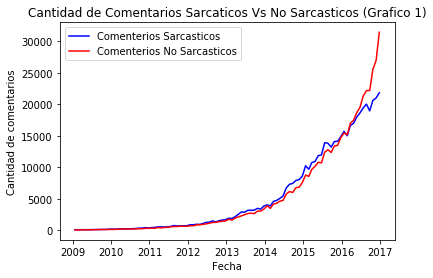

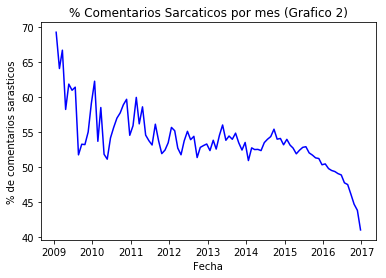

In [15]:
import matplotlib.dates as mdates

#Lista que guardara las fechas
sarcasmo_x = []
#Lista que guardara la cantidad de comentarios sarcasticos
cantidad_comentarios_sarc = []
#Lista que guardara la cantidad de comentarios no sarcasticos
cantidad_comentarios_Nosarc = []
#Lista que guardara el porcentaje de comentarios sarcasticos
sarcasmo_y = []

for i in fechas:
    sarcasmo_x.append(i)
sarcasmo_x.sort()
for j in sarcasmo_x:
    sarcasmo_y.append(100*fechas[j][1]/sum(fechas[j]))
    cantidad_comentarios_sarc.append(fechas[j][1])
    cantidad_comentarios_Nosarc.append(fechas[j][0])

#Se crea una nueva lista con el formato necesario para crear el grafico
eje_x = mdates.datestr2num(sarcasmo_x)

#Se crean los graficos
plt.plot_date(eje_x, cantidad_comentarios_sarc,'b-', label = 'Comenterios Sarcasticos')
plt.plot_date(eje_x, cantidad_comentarios_Nosarc,'r-', label = 'Comenterios No Sarcasticos')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de comentarios')
plt.title('Cantidad de Comentarios Sarcaticos Vs No Sarcasticos (Grafico 1)')
plt.legend()
plt.show()

plt.plot_date(eje_x, sarcasmo_y,'b-')
plt.xlabel('Fecha')
plt.ylabel('% de comentarios sarasticos')
plt.title('% Comentarios Sarcaticos por mes (Grafico 2)')
plt.show()


### Respuesta pregunta 1.d
Para realizar la línea del tiempo (Grafico 1) se consideró las fechas de la columna “date”, y lo que se hizo fue agrupar los comentarios por mes, para luego contar cuantos comentarios sarcásticos y no sarcásticos existían en cada mes. Finalmente se realizo el “Grafico 1” con “Cantidad de comentarios” en el eje Y, y “Fecha” en el eje X, en donde la curva azul representa la cantidad de comentarios sarcásticos, y la roja, la cantidad de comentarios no sarcásticos. Si se realiza un análisis de este gráfico, se observa casi un aumento exponencial en la cantidad de comentarios totales dentro de la plataforma Reddit, en donde, desde el año 2010 hasta finales del año 2015, existe una mayor cantidad de comentarios sarcásticos con respecto a los no sarcásticos, aunque esta diferencia es relativamente pequeña. Aun así, a mediados del 2016 esta diferencia comenzó a hacerse más significativa, aumentando mucho más los comentarios no sarcásticos. 
Con la finalidad de obtener una mejor conclusión, se creó un segundo gráfico, el cual muestra cómo se comportó el porcentaje de comentarios sarcásticos por mes en el tiempo. Vemos que, en un comienzo, existía un alto nivel de sarcasmo, pues el 69% aproximadamente de los comentarios de los primeros meses eran sarcásticos, pero este porcentaje fue disminuyendo significativamente en el transcurso del tiempo. Anteriormente se menciono que a finales del 2015 la cantidad de comentarios no sarcásticos supero a la de comentarios sarcásticos, y que en 2016 la diferencia entre ambos aumentó mucho más. Esto también se ve reflejado en este gráfico, en donde a partir del 2015 la pendiente se hizo más pronunciada en comparación al resto del grafico.

>e) Haga un histograma y boxplot de los puntajes de comentarios sarcásticos y no sarcásticos, comparelos y concluya a partir de lo que observa, puede agregar otro tipo de gráficos si desea para apoyar su conclusión.

### Código pregunta 1.e

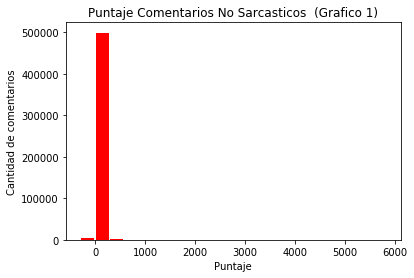

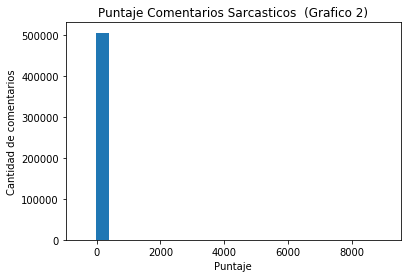

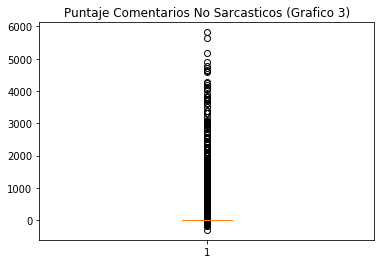

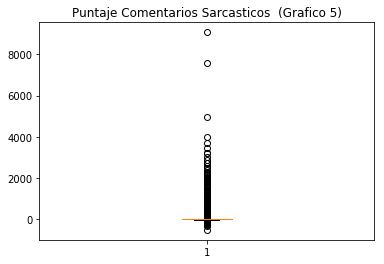

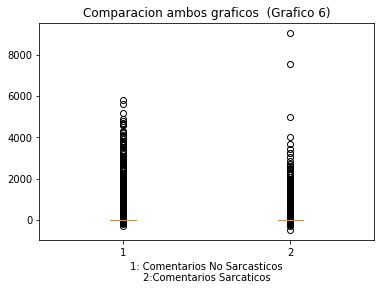

In [16]:
import matplotlib.pyplot as plt
import numpy as np

#Se crea una lista para comentarios sarcasticos y no sarcasticos con todos sus puntajes
puntaje_sarcasticos = []
puntaje_Nosarcasticos = []
#El k se calculo utilizando el criterio de Sturges, y sera utilizado para crear el histograma
i = 0
while i < n:
    if label[i] == '0':
        puntaje_Nosarcasticos.append(int(score[i]))
    else:
         puntaje_sarcasticos.append(int(score[i]))
    i+=1

#Se crean los histogramas y los boxplots
plt.hist(puntaje_Nosarcasticos, bins = 21, rwidth=.9, color='red')
plt.title('Puntaje Comentarios No Sarcasticos  (Grafico 1)')
plt.xlabel('Puntaje')
plt.ylabel('Cantidad de comentarios')
plt.show()


plt.hist(puntaje_sarcasticos, bins = 21, rwidth=.9,)
plt.title('Puntaje Comentarios Sarcasticos  (Grafico 2)')
plt.xlabel('Puntaje')
plt.ylabel('Cantidad de comentarios')
plt.show()

plt.boxplot(puntaje_Nosarcasticos)
plt.title('Puntaje Comentarios No Sarcasticos (Grafico 3)')
plt.show()

plt.boxplot(puntaje_sarcasticos)
plt.title('Puntaje Comentarios Sarcasticos  (Grafico 5)')
plt.show()

plt.boxplot([puntaje_Nosarcasticos,puntaje_sarcasticos])
plt.xlabel('1: Comentarios No Sarcasticos\n2:Comentarios Sarcaticos')
plt.title('Comparacion ambos graficos  (Grafico 6)')
plt.show()

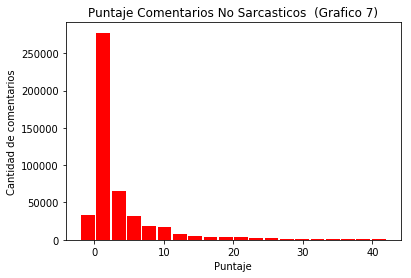

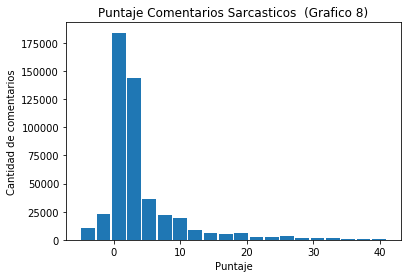

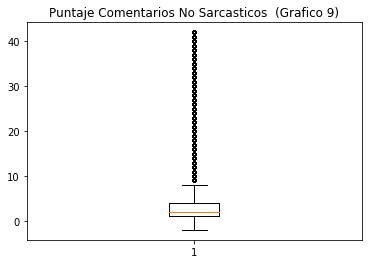

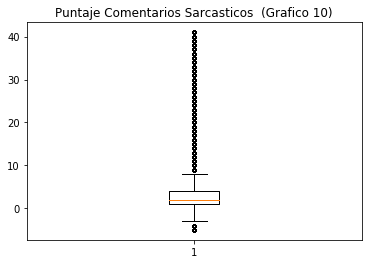

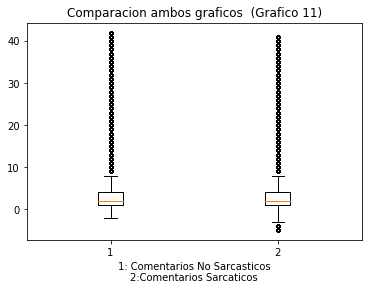

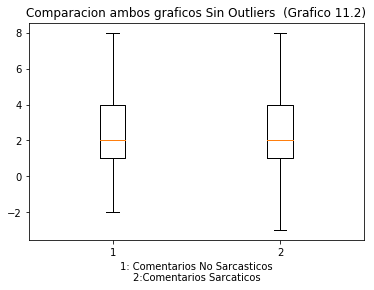

In [17]:
#Con el fin de obtener graficos mas representativos, se crearon nuevos,  ignorando el 2,5% de los datos inferiores y el 2,5% de los datos superiores
puntaje_Nosarcasticos.sort()
puntaje_sarcasticos.sort()
#Indica cuantos comentarios corresponden al 2,5% de los comentarios no sarcasticos
intervalo1 = int(len(puntaje_Nosarcasticos)*0.025)
#Indica cuantos comentarios corresponden al 2,5% de los comentarios sarcasticos
intervalo2 = int(len(puntaje_sarcasticos)*0.025)

#Se crean nuevas listas, ignorando el 2,5% de los datos inferiores y el 2,5% de los datos superiores
puntaje_Nosarcasticos2 = puntaje_Nosarcasticos[intervalo1:len(puntaje_Nosarcasticos)-intervalo1]
puntaje_sarcasticos2 = puntaje_sarcasticos[intervalo2:len(puntaje_sarcasticos)-intervalo2]

#Se crean los mismos graficos, pero en este caso se ignoran el 2,5% de los datos inferiores y el 2,5% de los datos superiores
plt.hist(puntaje_Nosarcasticos2, bins=20, rwidth=.9, color='red')
plt.title('Puntaje Comentarios No Sarcasticos  (Grafico 7)')
plt.xlabel('Puntaje')
plt.ylabel('Cantidad de comentarios')
plt.show()

plt.hist(puntaje_sarcasticos2, bins = 20, rwidth=.9)
plt.title('Puntaje Comentarios Sarcasticos  (Grafico 8)')
plt.xlabel('Puntaje')
plt.ylabel('Cantidad de comentarios')
plt.show()

plt.boxplot(puntaje_Nosarcasticos2, sym='.')
plt.title('Puntaje Comentarios No Sarcasticos  (Grafico 9)')
plt.show()

plt.boxplot(puntaje_sarcasticos2,sym='.')
plt.title('Puntaje Comentarios Sarcasticos  (Grafico 10)')
plt.show()

plt.boxplot([puntaje_Nosarcasticos2,puntaje_sarcasticos2],sym='.')
plt.title('Comparacion ambos graficos  (Grafico 11)')
plt.xlabel('1: Comentarios No Sarcasticos\n2:Comentarios Sarcaticos')
plt.show()

plt.boxplot([puntaje_Nosarcasticos2,puntaje_sarcasticos2],sym='')
plt.title('Comparacion ambos graficos Sin Outliers  (Grafico 11.2)')
plt.xlabel('1: Comentarios No Sarcasticos\n2:Comentarios Sarcaticos')
plt.show()


### Respuesta pregunta 1.e
Tras realizar los primeros gráficos, se notó tanto en el histograma como en el grafico de cajón con bigote que la gran mayoría de los datos se concentraba en puntajes entre -10 y 50, es decir, como se puede apreciar en el grafico 1 y 2, se obtenía una sola barra visible que contenía aproximadamente el 90% de los datos, mientras que el resto de las barras que contenían puntajes mayores, al ser tan pequeñas la cantidad de sus datos, simplemente eran inapreciables. Lo mismo ocurrió en el grafico de cajón con bigote, en donde, el 50% se encontraba principalmente en puntajes entre 1 y 4, y puntajes mayores a 8 correspondían a outliers, pero al ser estos puntajes mucho mayores, provocaba un gráfico poco analizable. Una explicación al porque existen puntajes muy grandes que se escapan del resto es debido a que en las redes sociales existen unos pocos usuarios que tienen muchos seguidores y son muy apoyados, como por ejemplo, las celebridades, y estos usuarios al comentar algo, tendrán mucho más  apoyo que un usuario ordinario, lo que se traduce en puntajes excesivamente mas altos que el resto y como se mencionó, son pocos los usuarios con mucha popularidad, esto significa, que existirán pocos comentarios con mucho puntaje y la mayoría de comentarios serán de usuarios ordinarios con puntajes ordinarios.
Por lo tanto, con el fin de mejorar los gráficos, se ignoró el 2,5% de los datos inferiores y el 2,5% de los datos superiores, en otras palabras, aquella minoría que no era representativa de la muestra y así se obtuvieron los gráficos 7, 8, 9, 10, y 11 que representan de mejor manera la datos.
Si se analizan los histogramas (gráficos 7 y 8), es posible notar que, en ambos, la moda de puntajes en comentarios no sarcásticos y sarcásticos se encuentra entre 0 y 2, con aproximadamente 275.000 comentarios no sarcásticos y con 185.000 comentarios sarcásticos. Por otro lado, en comentarios sarcásticos existe una segunda moda correspondiente a puntajes entre 2 y 4 con aproximadamente 140.000 comentarios, es decir, los comentarios sarcásticos tienden a tener ligeramente mayor puntaje que los no sarcásticos.
En cuanto a los gráficos de cajón con bigote (gráficos 9 y 10), se aprecia que ambos gráficos son prácticamente similares, incluso colocando uno al lado del otro (grafico 11), resulta muy difícil notar las diferencias, lo que significa que los comentarios no sarcásticos y sarcásticos se comportan de manera similar en cuanto al puntaje se refiere, teniendo en cuenta además que ambas muestras tienen aproximadamente la misma cantidad de datos.
En cuanto a los gráficos de cajón con bigote (gráficos 9 y 10), se aprecia que ambos gráficos son prácticamente similares, incluso colocando uno al lado del otro (grafico 11), resulta muy difícil notar las diferencias, lo que significa que los comentarios no sarcásticos y sarcásticos se comportan de manera similar en cuanto al puntaje se refiere, teniendo en cuenta además que ambas muestras tienen aproximadamente la misma cantidad de datos. Con el fin de obtener una mejor visualización, se creó el gráfico 11.2, el cual contiene la misma información que el gráfico 11, pero ignorando los outlayers. Por lo tanto, si se realiza un análisis de este, notaremos que el 25% de los comentarios tienen un puntaje aproximadamente menor a 1, luego, el 50% de los comentarios tienen un puntaje menor a 2, y un 25% de los comentarios totales tienen puntaje entre 1 y 2. El otro 50% de los comentarios tienen un puntaje mayor a 2, en donde, un 25% de los comentarios totales se encuentran con puntajes entre 2 y 4 y el otro 25% tienen puntajes mayores a 4. Finalmente, el 50% de comentarios tienen puntaje aproximado entre 1 y 4.

## 2. Simulaciones 

Una de las gracias de tener una máquina con alta capacidad de cómputo es el poder realizar simulaciones. Las simulaciones nos permiten recrear experimentos que requieren una gran cantidad de datos, por ejemplo, lanzar un dado 10000 veces y determinar las probabilidades de cada resultado posible.


### 2.1 Lanzamiento de Agujas (30p)

Imagine que tiene un puñado de agujas ($n$ agujas) y las lanza al aire, estas agujas caen aleatoriamente dentro de un espacio de 20x20 unidades (asuma que la aguja puede quedar con una parte afuera y otra adentro si cae en alguno de los bordes/cerca de un borde de este espacio), este espacio tiene líneas horizontales cada 1 unidad en el eje Y, obviando los bordes inferior y superior de este espacio, usted está interesado en determinar la probabilidad de que una aguja atraviese cualquiera de estas líneas horizontales, para ello ha decidido simular este experimento utilizando el centroide de la aguja (posición donde cae) y el ángulo medido respecto a la horizontal que atraviesa el centroide $\alpha$ (ver imagen)

<img src="img/aguja.png" style="float:center;height:100px">

El largo de la aguja es el mismo que la separación entre las lineas horizontales (1 unidad)


Calcule la probabilidad utilizando $n =10,100,1000,10000,100000$ agujas

Puntos bonus por :
* (5) Probar con tamaños distintos del espacio y concluir comparando con los otros casos
* (5) Añadir 1 gráfico por cada $n$ donde se vea el espacio y las agujas después de caer, recuerde hacer un comentario respecto al gráfico, no solo incluirlo.

### Código pregunta 2

In [3]:
import random
import math

def simulacion(lanzamientos,espacio_lineas):
    #Variable que guardara los casos existosos
    exitosos = 0
    for i in range(lanzamientos):
        #Se simula el lanzamiento definiendo aleatoriamente el centro de masa y el angulo
        centro_masaY = random.uniform(0,20)
        centro_masaX = random.uniform(0,20)
        angulo = random.uniform(0,math.pi/2)
        #Se obtiene la parte decimal de la coordenada Y
        decimal = (centro_masaY - int(centro_masaY))
        #Si la parte decimal es mayor a la mitad del espacio entre las lineas, significa que el centro de masa es mas cercano a la linea superior
        if decimal >= espacio_lineas/2.0:
            #Se calcula la distancia de la linea superior al centro de masa
            distancia = 1-decimal
            #Se ve si la aguja cruza la linea utilizando trigonometria
            if distancia < 0.5*math.sin(angulo):
                exitosos+=1
        #Si la distancia es menor a la mitad del espacio entre las lineas, entonces, el centro de masa esta mas cercano a la linea inferior
        elif decimal < espacio_lineas/2.0:
            if decimal < 0.5*math.sin(angulo):
                exitosos+=1           
    return exitosos/lanzamientos

print('Si el experimento se realiza 5 veces se obtienen los siguientes resultados')
for i in range(5):
    print('EXPERIMENTO', i+1)
    print('La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 10 agujas es:',simulacion(10,1))
    print('La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 100 agujas es:',simulacion(100,1))
    print('La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 1000 agujas es:',simulacion(1000,1))
    print('La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 10000 agujas es:',simulacion(10000,1))
    print('La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 100000 agujas es:',simulacion(100000,1))




Si el experimento se realiza 5 veces se obtienen los siguientes resultados
EXPERIMENTO 1
La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 10 agujas es: 0.7
La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 100 agujas es: 0.67
La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 1000 agujas es: 0.64
La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 10000 agujas es: 0.6272
La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 100000 agujas es: 0.63648
EXPERIMENTO 2
La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 10 agujas es: 0.4
La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 100 agujas es: 0.59
La probabilidad de que una aguja atraviese una linea horizontal con el lanzamiento de 1000 agujas es: 0.629
La probabilidad de que una aguja atravie

### Respuesta pregunta 2
Si el experimento se realiza varias veces, se observa que la probabilidad de que una aguja atraviese una de las lineas horizontales, es aproximadamente 63%


### 2.2 Cadenas de Markov (40p)

Las cadenas de markov son un modelo estocástico para describir una secuencia de sucesos donde la probabilidad de ir a un estado siguiente depende solamente del estado actual, esto se puede modelar de la siguiente forma:

$$ S_{n+1} = S_{n}\cdot P$$

Donde $P$ se conoce como matriz de transición y $S_{i}$ las matrices de estado ($S_{0}$ es conocida). Una cadena de markov se dice regular si su matriz de transición es regular, esto quiere decir que alguna potencia de $P$ tiene todas sus entradas positivas (para este caso 0 no es positivo).

Si se tiene una cadena de markov regular, en algún momento de la secuencia se encontrará una matriz de estado tal que:

$$ S_{f} \cdot P = S_{f}$$ 

A esta matriz $S_{f}$ se le conoce como matriz estacionaria.

Si desea profundizar más:
- [MC 1](https://www.youtube.com/watch?v=uvYTGEZQTEs)
- [MC 2](https://www.youtube.com/watch?v=jtHBfLtMq4U)
- [MC 3](https://www.youtube.com/watch?v=P8DuuiINAo4&t)
- [MC 4](https://www.youtube.com/watch?v=31X-M4okAI0)
- [MC 5](https://www.youtube.com/watch?v=-kwnnNSGFMc)


**Enunciado**

Tres compañías de comida rápida están compitiendo por el primer lugar en la supremacía de comida rápida. 

* Si un cliente originalmente es fiel a "Sansafood" tiene un $65\%$ de probabilidad de quedarse fiel a esta, un $20\%$ de cambiarse a "LDS ltda" y un $15\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "LDS ltda" tiene un $40\%$ de probabilidad de quedarse fiel a esta, un $30\%$ de cambiarse a "Sansafood" y un $30\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "Wenzi's" tiene un $70\%$ de probabilidad de quedarse fiel a esta, un $10\%$ de cambiarse a "Sansafood" y un $20\%$ de cambiarse a "LDS ltda".

En un comienzo 200 clientes pertenecen a "Sansafood", 180 a "LDS ltda" y 20 a "Wenzi's".

>a) Identifique la matriz de transición y la matriz de estado inicial

### Código pregunta 3.a

In [3]:
import numpy as np
import pandas

#Se crea la matriz de transicion
transicion = np.array([
    [0.65,0.2,0.15],
    [0.3,0.4,0.3],
    [0.1,0.2,0.7]
])

#Se crea la matriz inicial
inicial = np.array([
    [0.5,0.45,0.05]
])

#Se define la descripcion de cada fila y columna de la matriz
titulos = ['Sansafood', 'LDS ltda', 'Wenzis']

#Se muestra la matriz
print('La matriz de transicion correspode a:')
matriz_transicion = pandas.DataFrame(transicion, columns=titulos, index=titulos)
matriz_transicion

La matriz de transicion correspode a:


,Sansafood,LDS ltda,Wenzis
Sansafood,0.65,0.2,0.15
LDS ltda,0.30,0.4,0.30
Wenzis,0.10,0.2,0.70


In [2]:
print('La matriz inicial corrsponde a')
matriz_inicial = pandas.DataFrame(inicial, columns=titulos, index = [''])
matriz_inicial

La matriz inicial corrsponde a


,Sansafood,LDS ltda,Wenzis
,0.5,0.45,0.05


### Respuesta pregunta 3.a
Las matrices obtenidas fueron las siguientes:

#### Matriz de transición 

 --- |Sansafood | LDS ltda | Wenzi's
--- | --- | --- | ---
 **Sansafood** |0.65 | 0.2 | 0.15
 **LDS Itda** |0.3 | 0.4 | 0.3
 **Wenzi's** |0.1 | 0.2 | 0.7

#### Matriz inicial

Sansafood | LDS ltda | Wenzi's
--- | --- | ---
0.5 | 0.45 | 0.05

>**O:** b) Haga un diagrama de transición 

### Respuesta pregunta 3.d
<img src="img/diagrama_3c.png">

>**O:** c) ¿Este problema es un caso de una cadena de markov regular? ¿Por qué?

### Respuesta pregunta 3.c
Si es un caso de cadena de markov regular, pues la matriz de transición es regular (todas sus entradas son positivas)

>d) ¿Existirá la matriz estacionaria en este caso? Si su respuesta es sí, obténgala.

### Código pregunta 3.d

In [4]:
#Se crea un flag para finalizar el while una vez encontrada la matriz, pues se sabe que existe al ser una cadena de markov regular
flag = True
while flag:
    estacionaria = np.matmul(inicial,transicion)
    #Si ambos arreglos son iguales, significa que se encontro la matriz estacionaria
    if np.array_equal(estacionaria,inicial):
        flag = False
print('La matriz estacionaria corresponde a:')
matriz_inicial = pandas.DataFrame(estacionaria, columns=titulos, index = [''])
matriz_inicial

KeyboardInterrupt: 

### Respuesta pregunta 3.d
Si existe una matiz estacionaria ya que este caso pertenece a una cadena de markov regular, y la matriz corresponde a:

Sansafood | LDS ltda | Wenzi's
--- | --- | ---
0.33333333 | 0.25 | 0.416666667


>e) Después de pasado mucho tiempo. ¿Quién tendrá una mayor cantidad de clientes? Asuma que la matriz de transición será válida por todo este periodo arbitrario de tiempo y no llegarán ni saldrán más clientes del mundo de comida rápida. **No realice esta simulación como una multiplicación de matrices**, use las probabilidades y las cantidades dadas. Compare con d) 

In [7]:
#Arreglo que tiene la cantidad de personas por local de comida
personas = np.array([
    [200,180,20]
])

#Escoge segun las probabilidades las personas que se quedaran en sansafood, o que se iran a otro local, retorna un diccionario con la cantidad de personas que se quedaron en Sansafood, las cantidad de personas que se fueron a LDS ltda y las que se fueron a Wenzis
def sansafood(pers):
    cambios = {'Sansafood':0,'LDS ltda':0,'Wenzis':0}
    #Se itera segun la cantidad de personas en Sansafood
    for i in range(pers[0][0]):
        #Se escge segun las probabilidades dadas entre Sansafood, LDS ltda y Wenzis, estando en Sansafood
        cambio = np.random.choice(titulos,p = [0.65,0.2,0.15])
        cambios[cambio] +=1
    return cambios


#Escoge segun las probabilidades las personas que se quedaran en Lds ltda, o que se iran a otro local, retorna un diccionario con la cantidad de personas que se quedaron en Lds ltda, las cantidad de personas que se fueron a Sansafood y las que se fueron a Wenzis
def lds(pers):
    cambios = {'Sansafood':0,'LDS ltda':0,'Wenzis':0}
    #Se itera segun la cantidad de personas en LDS ltda
    for i in range(pers[0][1]):
         #Se escge segun las probabilidades dadas entre Sansafood, LDS ltda y Wenzis, estando en LDS ltda
        cambio = np.random.choice(titulos,p = [0.3,0.4,0.3])
        cambios[cambio] +=1
    return cambios

#Escoge segun las probabilidades las personas que se quedaran en Wenzis, o que se iran a otro local, retorna un diccionario con la cantidad de personas que se quedaron en Wenzis, las cantidad de personas que se fueron a Sansafood y las que se fueron a Lds ltda
def wenzis(pers):
    cambios = {'Sansafood':0,'LDS ltda':0,'Wenzis':0}
    #Se itera segun la cantidad de personas en Wenzis
    for i in range(pers[0][2]):
         #Se escge segun las probabilidades dadas entre Sansafood, LDS ltda y Wenzis, estando en Wenzis
        cambio = np.random.choice(titulos,p = [0.1,0.2,0.7])
        cambios[cambio] +=1
    return cambios

#Se simula lo que pasaria en 1000 unidades de tiempo
for i in range(1000):
    cambio1 = sansafood(personas)
    cambio2 = lds(personas)
    cambio3 = wenzis(personas)
    #Se actualiza la matriz con la cantidad de personas segun lo obtenido por cada funcion
    personas[0][0] = cambio1['Sansafood']+cambio2['Sansafood']+cambio3['Sansafood']
    personas[0][1] = cambio1['LDS ltda']+cambio2['LDS ltda']+cambio3['LDS ltda']
    personas[0][2] = cambio1['Wenzis']+cambio2['Wenzis']+cambio3['Wenzis']

estacionaria2 = personas/400
print('La matriz luego de haber pasado mucho tiempo corresponde a:')
est2 = pandas.DataFrame(estacionaria2, columns=titulos, index = [''])
est2

La matriz luego de haber pasado mucho tiempo corresponde a:


,Sansafood,LDS ltda,Wenzis
,0.3125,0.2625,0.425


### Respuesta pregunta 3.e
Tras haber pasado mucho tiempo, y asumiendo que la matriz de transición es constante en todo ese período, la matriz obtenida luego de la simulación fue la siguiente:

Sansafood | LDS ltda | Wenzi's
--- | --- | ---
0.3125 | 0.2625 | 0.425

La cual se asemeja enormemente a la matriz estacionaria obtenida de manera teórica en la "pregunta d", por lo que se puede afirmar que el cálculo teórico realizado, efectivamente es una buena representación de la realidad obviando todas las suposiciones realizadas (matriz de transición constante y cantidad de clientes constante). 

Si se analizan los datos obtenidos, vemos que pasado mucho tiempo, el 31.25% de las personas aproximadamente (125 personas), preferirá “Sansafood” , el 26,25% (105 personas), “LDS ltda”, y el 42,5% (170 personas) preferirá “Wenzi’s”, concluyendo que la compañía de comida rápida que mayor cantidad de clientes tendrá, será “Wenzi’s”.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el  día 31 de Marzo a las 23hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.2
+ La versión de Python que se usará para revisar es 3.6.8
+ Los alumnos malla nueva que decidan responder las preguntas opcionales (obviando algún bonus para todos) tendrán 1 punto bonus por pregunta correctamente respondida, con un máximo de nota 100.
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, explique su procedimiento y luego responda. 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)